## Part 4 Download and Explore Farmers Market dataset ##

In [1]:
# @hidden_cell
# The project token is an authorization token that is used to access project resources like data sources, connections, and used by platform APIs.
from project_lib import Project
project = Project(project_id='5a2adf8d-3475-4d13-bc55-a5027d959c33', project_access_token='p-c5c9a25c59ecc901bea1018c7fc26a3657c62b52')
pc = project.project_context

In [2]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import matplotlib.ticker as ticker

# notice: installing seaborn might takes a few minutes
!conda install -c anaconda seaborn -y
import seaborn as sns

!conda install -c conda-forge folium=0.5.0 --yes 
import folium # map rendering library

print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - geopy


The following NEW packages will be INSTALLED:

    geographiclib:   1.50-py_0           conda-forge
    geopy:           1.22.0-pyh9f0ad1d_0 conda-forge
    python_abi:      3.6-1_cp36m         conda-forge

The following packages will be UPDATED:

    ca-certificates: 2020.1.1-0                      --> 2020.4.5.2-hecda079_0     conda-forge
    certifi:         2020.4.5.1-py36_0               --> 2020.4.5.2-py36h9f0ad1d_0 conda-forge
    openssl:         1.1.1g-h7b6447c_0               --> 1.1.1g-h516909a_0         conda-forge

Preparing transaction: done
Verifying transaction: done
Executing transaction: done
Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - seaborn


The following packages will be downloaded:

    package                    |            build
    --------

The dataset is downloaded from the website. The link is as given below :

https://data.cityofnewyork.us/dataset/DOHMH-Farmers-Markets-and-Food-Boxes/8vwk-6iz2

In [3]:
# Data from website - https://data.cityofnewyork.us/dataset/DOHMH-Farmers-Markets-and-Food-Boxes/8vwk-6iz2
my_file = project.get_file("DOHMH_Farmers_Markets_and_Food_Boxes.csv")

# Read the CSV data file from the object storage into a pandas DataFrame
my_file.seek(0)
FM_NYC=pd.read_csv(my_file)

In [4]:
FM_NYC.head()

,Borough,Market Name,Service Type,Street Address,Latitude,Longitude,Days of Operation,Hours of Operations,Season Dates,Accepts EBT,Open Year-Round,Stellar Cooking Demonstrations,Food Activities for Kids,Location Point
0,Brooklyn,Woodhull Hospital Youthmarket,Farmers Markets,Broadway & Flushing Ave,40.700726,-73.941932,Wednesday,9 a.m. - 2 p.m.,07/10/2019-11/27/2019,Yes,No,No,No,"(40.700726, -73.941932)"
1,Manhattan,Mount Sinai Hospital Greenmarket,Farmers Markets,E 99th St bet Madison & Park Aves,40.789169,-73.952743,Wednesday,8 a.m. - 5 p.m.,06/12/19-11/27/19,Yes,No,No,No,"(40.789169, -73.952743)"
2,Bronx,170 Farm Stand,Farmers Markets,E 170th St & Townsend Ave,40.839882,-73.916783,Wednesday,2:30 - 6:30 p.m.,07/10/2019-11/27/2019,Yes,No,No,Yes,"(40.839882, -73.916783)"
3,Manhattan,Greenmarket at Oculus Plaza,Farmers Markets,"Church & Fulton Sts, on Oculus Plaza",40.711535,-74.010464,Tuesday,7 a.m. - 7 p.m.,07/09/2019-11/30/19,Yes,Yes,No,No,"(40.711535, -74.010464)"
4,Queens,Ditmars Park Youthmarket,Farmers Markets,"Steinway St bet Ditmars Blvd & 23rd Ave, at Di...",40.772854,-73.906061,Saturday,8 a.m. - 3 p.m.,07/13/2019-11/23/2019,Yes,No,No,No,"(40.772854, -73.906061)"


Website-https://www.grownyc.org/greenmarketco/foodbox GrowNYC's Fresh Food Box Program is a food access initiative that enables under-served communities to purchase fresh, healthy, and primarily regionally grown produce well below traditional retail prices.

A farmers' market is often defined as a public site used by two or more local or regional producers for the direct sale of farm products to consumers. In addition to fresh fruits and vegetables, markets may sell dairy products, fish, meat, baked goods, and other minimally processed foods.

So, in this we will filter farmers' market data and explore it.

In [5]:
FM_NYC.rename(columns={'Service Type':'Service_Type'}, inplace=True)
FM_NYC.rename(columns={'Market Name':'Market_Name'}, inplace=True)

print(FM_NYC.Service_Type.unique())

['Farmers Markets' 'Food Boxes']


In [6]:
FM_NYC['Service_Type'].value_counts().to_frame()

,Service_Type
Farmers Markets,124
Food Boxes,14


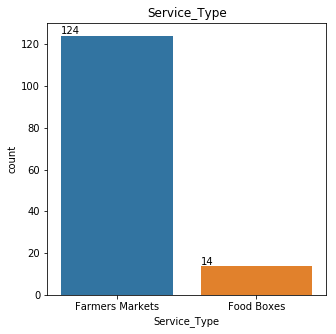

In [7]:
fig,ax = plt.subplots(1, 1, figsize=(5, 5))
sns.countplot(x='Service_Type',data=FM_NYC)
ax.set_title("Service_Type")
for t in ax.patches:
    if (np.isnan(float(t.get_height()))):
        ax.annotate('', (t.get_x(), 0))
    else:
        ax.annotate(str(format(int(t.get_height()), ',d')), (t.get_x(), t.get_height()*1.01))
    
plt.show();

In [8]:
# FM_NYC_filtered - Dataset with only Farmers Market
FM_NYC_filtered = FM_NYC[FM_NYC['Service_Type'] == 'Farmers Markets'].copy()
FM_NYC_filtered ['Borough'] = FM_NYC_filtered['Borough'].map(lambda x: x.strip())
print(FM_NYC_filtered.shape)
FM_NYC_filtered.head()

(124, 14)


,Borough,Market_Name,Service_Type,Street Address,Latitude,Longitude,Days of Operation,Hours of Operations,Season Dates,Accepts EBT,Open Year-Round,Stellar Cooking Demonstrations,Food Activities for Kids,Location Point
0,Brooklyn,Woodhull Hospital Youthmarket,Farmers Markets,Broadway & Flushing Ave,40.700726,-73.941932,Wednesday,9 a.m. - 2 p.m.,07/10/2019-11/27/2019,Yes,No,No,No,"(40.700726, -73.941932)"
1,Manhattan,Mount Sinai Hospital Greenmarket,Farmers Markets,E 99th St bet Madison & Park Aves,40.789169,-73.952743,Wednesday,8 a.m. - 5 p.m.,06/12/19-11/27/19,Yes,No,No,No,"(40.789169, -73.952743)"
2,Bronx,170 Farm Stand,Farmers Markets,E 170th St & Townsend Ave,40.839882,-73.916783,Wednesday,2:30 - 6:30 p.m.,07/10/2019-11/27/2019,Yes,No,No,Yes,"(40.839882, -73.916783)"
3,Manhattan,Greenmarket at Oculus Plaza,Farmers Markets,"Church & Fulton Sts, on Oculus Plaza",40.711535,-74.010464,Tuesday,7 a.m. - 7 p.m.,07/09/2019-11/30/19,Yes,Yes,No,No,"(40.711535, -74.010464)"
4,Queens,Ditmars Park Youthmarket,Farmers Markets,"Steinway St bet Ditmars Blvd & 23rd Ave, at Di...",40.772854,-73.906061,Saturday,8 a.m. - 3 p.m.,07/13/2019-11/23/2019,Yes,No,No,No,"(40.772854, -73.906061)"


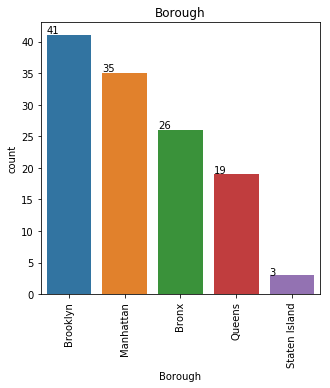

In [9]:
fig,ax = plt.subplots(1, 1, figsize=(5, 5))
sns.countplot(x='Borough',data=FM_NYC_filtered)
ax.set_title("Borough")
for t in ax.patches:
    if (np.isnan(float(t.get_height()))):
        ax.annotate('', (t.get_x(), 0))
    else:
        ax.annotate(str(format(int(t.get_height()), ',d')), (t.get_x(), t.get_height()*1.01))
        ax.set_xticklabels([t.get_text().split("T")[0] for t in ax.get_xticklabels()])

# This sets the yticks "upright" with 0, as opposed to sideways with 90.
plt.xticks(rotation=90) 
plt.show()

Use geopy library to get the latitude and longitude values of New York City.

The geograpical coordinate of New York City are 40.7308619, -73.9871558.

In [10]:
address = 'New York City, NY'

geolocator = Nominatim(user_agent="Jupyter")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of New York City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of New York City are 40.7127281, -74.0060152.


Create a map of New York with Facility name and Borough of Farmers Market superimposed on top

In [11]:
# create map of New York City using latitude and longitude values
map_markets = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, Market_Name, borough in zip(FM_NYC_filtered['Latitude'], FM_NYC_filtered['Longitude'], FM_NYC_filtered['Market_Name'], FM_NYC_filtered['Borough']):
            label = '{}, {}'.format(Market_Name, borough)
            label = folium.Popup(label, parse_html=True)
            folium.CircleMarker(
                [lat, lng],
                radius=5,
                popup=label,
                color='green',
                fill=True,
                fill_color='green',
                fill_opacity=0.7,
                parse_html = False).add_to(map_markets)  

map_markets